In [1]:
import json
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
#import sys
from sklearn.linear_model import LinearRegression
#print(sys.executable)
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Kazage/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
FILENAME = '/Users/Kazage/Development/DataScienceNotebooks/sample-jobs/sample-job.json'

In [4]:
raw_data = pd.read_json(FILENAME, orient='records', lines=True)

In [5]:
# See the summary of the data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 74 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   salaryInsights                                     25 non-null     object
 1   country                                            25 non-null     object
 2   jobApplicantsManagementSettingsUrn                 25 non-null     object
 3   standardizedTitle                                  25 non-null     object
 4   companyDetails                                     25 non-null     object
 5   jobPosterEntitlements                              25 non-null     object
 6   smartSnippets                                      25 non-null     object
 7   commuteDescription                                 25 non-null     object
 8   listingType                                        25 non-null     object
 9   employmentStatus       

The data has 74 columns and 25 rows.

In [41]:
# How do they look like
raw_data.head()

,salaryInsights,country,jobApplicantsManagementSettingsUrn,standardizedTitle,companyDetails,jobPosterEntitlements,smartSnippets,commuteDescription,listingType,employmentStatus,...,industries,allowedToEdit,location,sourceDomain,openToHiringJobSharingState,keywords,paging,applicantTrackingSystem,standardizedAddresses,companyDescription
0,"{'lockModuleShown': True, 'salaryExplorerUrl':...",urn:li:fs_country:us,urn:li:fs_jobApplicantsManagementSettings:2295...,urn:li:fs_title:25190,{'com.linkedin.voyager.jobs.JobPostingCompany'...,"{'entitledToPromoteJob': False, 'entitledToVie...",[2+ years of experience building data science/...,,PREMIUM,urn:li:fs_employmentStatus:FULL_TIME,...,"[25, 28, 113]",False,United States,careers.warnermediagroup.com,NOT_SHARED,data scientist,"{'total': 356, 'count': 25, 'start': 0, 'links...",NaN,NaN,NaN
1,"{'lockModuleShown': True, 'calloutCompany': Tr...",urn:li:fs_country:us,urn:li:fs_jobApplicantsManagementSettings:2295...,urn:li:fs_title:25190,{'com.linkedin.voyager.jobs.JobPostingCompany'...,"{'entitledToPromoteJob': False, 'entitledToVie...",[The ideal candidate will be excited about thi...,,PREMIUM,urn:li:fs_employmentStatus:FULL_TIME,...,"[96, 4, 6]",False,United States,corp.roblox.com,NOT_SHARED,data scientist,"{'total': 356, 'count': 25, 'start': 0, 'links...",Greenhouse,{'addresses': [{'postalAddress': {'addressCoun...,NaN
2,"{'providedByEmployer': False, 'cohortSize': 53...",urn:li:fs_country:us,urn:li:fs_jobApplicantsManagementSettings:2205...,urn:li:fs_title:25190,{'com.linkedin.voyager.jobs.JobPostingCompany'...,"{'entitledToPromoteJob': False, 'entitledToVie...","[Experience processing, filtering, and present...",,PREMIUM,urn:li:fs_employmentStatus:FULL_TIME,...,"[4, 96, 6]",False,United States,www.amazon.jobs,NOT_SHARED,data scientist,"{'total': 356, 'count': 25, 'start': 0, 'links...",NaN,NaN,NaN
3,"{'providedByEmployer': False, 'cohortSize': 29...",urn:li:fs_country:us,urn:li:fs_jobApplicantsManagementSettings:2295...,urn:li:fs_title:25190,{'com.linkedin.voyager.jobs.JobPostingCompany'...,"{'entitledToPromoteJob': False, 'entitledToVie...",[We are looking for an experienced and highly ...,,PREMIUM,urn:li:fs_employmentStatus:FULL_TIME,...,[24],False,United States,jobs.apple.com,NOT_SHARED,data scientist,"{'total': 356, 'count': 25, 'start': 0, 'links...",NaN,{'addresses': [{'postalAddress': {'addressCoun...,NaN
4,"{'lockModuleShown': True, 'calloutCompany': Tr...",urn:li:fs_country:us,urn:li:fs_jobApplicantsManagementSettings:2295...,urn:li:fs_title:25190,{'com.linkedin.voyager.jobs.JobPostingCompany'...,"{'entitledToPromoteJob': False, 'entitledToVie...",[What You Should Know. If you like disrupting ...,,PREMIUM,urn:li:fs_employmentStatus:FULL_TIME,...,"[48, 53, 43]",False,United States,www.carvana.com,NOT_SHARED,data scientist,"{'total': 356, 'count': 25, 'start': 0, 'links...",NaN,NaN,NaN


In [42]:
raw_data.country

0     urn:li:fs_country:us
1     urn:li:fs_country:us
2     urn:li:fs_country:us
3     urn:li:fs_country:us
4     urn:li:fs_country:us
5     urn:li:fs_country:us
6     urn:li:fs_country:us
7     urn:li:fs_country:us
8     urn:li:fs_country:us
9     urn:li:fs_country:us
10    urn:li:fs_country:us
11    urn:li:fs_country:us
12    urn:li:fs_country:us
13    urn:li:fs_country:us
14    urn:li:fs_country:us
15    urn:li:fs_country:us
16    urn:li:fs_country:us
17    urn:li:fs_country:us
18    urn:li:fs_country:us
19    urn:li:fs_country:us
20    urn:li:fs_country:us
21    urn:li:fs_country:us
22    urn:li:fs_country:us
23    urn:li:fs_country:us
24    urn:li:fs_country:us
Name: country, dtype: object

They look ugly and unreadable...

In [37]:
#list(raw_data['salaryInsights'])

In [38]:
#list(raw_data['jobPosterEntitlements'])

In [39]:
#raw_data['industries']

In [43]:
def extract_max_salary(job_dict):
    salary_insights = job_dict.get('salaryInsights')
    if salary_insights and salary_insights.get('insightExists'):
        # TODO: this is total if differs from base
        max_salary = max([i['maxSalary'] for i in salary_insights['compensationBreakdown']])
        return float(max_salary)
    else:
        return None
    
    
#def extract_max_salary(job_dict):
#    salary_insights = job_dict.get('salaryInsights')
 #   if salary_insights and salary_insights.get('compensationBreakdown'):
        # TODO: this is total if differs from base
 #       max_salary = max([i['maxSalary'] for i in salary_insights['compensationBreakdown']])
  #      return float(max_salary)
  #  else:
   #     return None    
    
def extract_min_salary(job_dict):
    salary_insights = job_dict.get('salaryInsights')
    if salary_insights and salary_insights.get('insightExists'):
        min_salary = max([i['minSalary'] for i in salary_insights['compensationBreakdown']])
        return float(min_salary)
    else:
        return None    
    
def extract_title(job_dict):
    return job_dict.get('title')

def extract_cohort_size(job_dict):
    salary_insights = job_dict.get('salaryInsights')
    if salary_insights and salary_insights.get('cohortSize'):
        cohort_size = float( salary_insights['cohortSize'])
        return cohort_size
    else:
        return None


def extract_standardized_title(job_dict):
    title_map = {'25190': 'data_scientist'}
    lookup_id = job_dict.get('standardizedTitle').split('urn:li:fs_title:')[1]
    if lookup_id in title_map.keys():
        return title_map[lookup_id]
    else:
        return lookup_id
    
def extract_skills(job_dict):
    return [i['value'] for i in job_dict['inferredSkillMatches']]

def extract_location(job_dict):
    return job_dict.get('formattedLocation')

def extract_applies(job_dict):
    return job_dict.get('applies')

def extract_views(job_dict):
    return job_dict.get('views')

def extract_text(job_dict):
    return job_dict['description']['text']

# def location

In [44]:
parsed_data = []
with open(FILENAME, 'r') as f:
    for line in f.readlines():
        job_dict = json.loads(line)
        max_salary = extract_max_salary(job_dict)
        min_salary = extract_min_salary(job_dict)
        job_title = extract_title(job_dict)
        standardized_title = extract_standardized_title(job_dict)
        location = extract_location(job_dict)
        skills = extract_skills(job_dict)
        cohort_size = extract_cohort_size(job_dict)
        applications = extract_applies(job_dict)
        views = extract_views(job_dict)
        text = extract_text(job_dict)
        parsed_data.append({'title': job_title, 'standardized_title': standardized_title,
                            'location': location,'skills': skills, 'max_salary': max_salary, 'min_salary': min_salary,
                            'Description': text,'cohort_size': cohort_size, 'applications': applications, 'views': views})

In [45]:
df = pd.DataFrame(parsed_data)

In [46]:
df.head()

,title,standardized_title,location,skills,max_salary,min_salary,Description,cohort_size,applications,views
0,"Data Scientist, Media Mix Modeling - HBO Max",data_scientist,"Los Angeles, CA, US","[Mathematics, SQL, Google BigQuery, Data Analy...",NaN,NaN,Company Overview \n\nWarnerMedia is a leading ...,NaN,3,14
1,Data Scientist - Fraud,data_scientist,"San Mateo, CA, US","[Statistics, Python (Programming Language), SQ...",346000.0,138000.0,WHY ROBLOX?\n\nRoblox is ushering in the next ...,NaN,49,194
2,Data Scientist,data_scientist,"Seattle, WA, US","[Hive, SQL, Written Communication, Java, Deep ...",67000.0,5000.0,Description\n\nBusiness/Team Introduction\nThe...,53.0,73,394
3,"Data Scientist, Systems Engineering",data_scientist,"Cupertino, CA, US","[System Performance, Python (Programming Langu...",35000.0,4200.0,\nSummary\n \nPlay a role in bringing autonomo...,29.0,11,170
4,"Data Scientist, Credit",data_scientist,"Phoenix, AZ, US","[Mathematics, Python (Programming Language), S...",122000.0,61300.0,About Carvana\n\nIf you like disrupting the no...,NaN,13,57


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               25 non-null     object 
 1   standardized_title  25 non-null     object 
 2   location            25 non-null     object 
 3   skills              25 non-null     object 
 4   max_salary          9 non-null      float64
 5   min_salary          9 non-null      float64
 6   Description         25 non-null     object 
 7   cohort_size         3 non-null      float64
 8   applications        25 non-null     int64  
 9   views               25 non-null     int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 2.1+ KB


In [49]:
df.title

0          Data Scientist, Media Mix Modeling - HBO Max
1                                Data Scientist - Fraud
2                                        Data Scientist
3                   Data Scientist, Systems Engineering
4                                Data Scientist, Credit
5                               Data Scientist (Remote)
6                       R&D Informatics & Data Engineer
7                            Data Scientist - 339738627
8                                        Data Scientist
9     Data Scientist - Inference & Experimentation F...
10                                    AI Data Scientist
11                                 Staff Data Scientist
12                                       Data Scientist
13                                       Data Scientist
14                                       Data Scientist
15                                       Data Scientist
16                                       Data Scientist
17                                       Data Sc

In [50]:
df.describe()

,max_salary,min_salary,cohort_size,applications,views
count,9.000000,9.00000,3.000000,25.000000,25.000000
mean,231555.555556,82600.00000,28.666667,55.960000,267.920000
std,143376.350134,49732.40895,24.501701,126.157468,420.292846
min,35000.000000,4200.00000,4.000000,0.000000,2.000000
25%,122000.000000,61300.00000,16.500000,4.000000,28.000000
50%,244000.000000,97400.00000,29.000000,18.000000,109.000000
75%,346000.000000,113000.00000,41.000000,68.000000,316.000000
max,452000.000000,138000.00000,53.000000,637.000000,1970.000000


In [15]:
#df['text'].values[0]

How many entries in this small sample correspond to the title of 'data_scientist'?

In [51]:
df[df.standardized_title == 'data_scientist'].count()

title                 22
standardized_title    22
location              22
skills                22
max_salary             9
min_salary             9
Description           22
cohort_size            3
applications          22
views                 22
dtype: int64

In this small sample of 25 jobs, 22 of them specifically look for 'data scientists'
only 3 of them provide the size of the company. Nine of them  provide max and min salaries for their employees

In [52]:
df['location'].value_counts()

San Francisco, CA, US          3
New York City, NY, US          2
Malvern, PA, US                1
Charlotte, NC, US              1
McLean, VA, US                 1
Bentonville, AR, US            1
San Francisco Bay Area         1
Dallas-Fort Worth Metroplex    1
Cincinnati, OH, US             1
Chicago, IL, US                1
Woodcliff Lake, NJ, US         1
Phoenix, AZ, US                1
Denver, CO, US                 1
Overland Park, KS, US          1
Maryville, TN, US              1
Wilmington, DE, US             1
Portland, OR, US               1
Los Angeles, CA, US            1
San Mateo, CA, US              1
Seattle, WA, US                1
Cupertino, CA, US              1
America, IL, US                1
Name: location, dtype: int64

In this small sample there are more job offers in SF and NYC 

In [53]:
df['location'][0]

'Los Angeles, CA, US'

In [54]:
df['location'][0].split(',')[1]

' CA'

In [55]:
def extract_state(location):
    location_tuple = location.split(',')
    if len(location_tuple) == 3:
        return location_tuple[1].strip()
    else:
        return "NA"
assert extract_state('Los Angeles,  CA,  US') == 'CA'
        
    

In [56]:
df['state'] = df['location'].apply(extract_state)
df = df[['title', 'standardized_title', 'state', 'location', 'skills', 'Description', 'max_salary', 'min_salary',
         'cohort_size', 'applications', 'views']]  
df.head()

,title,standardized_title,state,location,skills,Description,max_salary,min_salary,cohort_size,applications,views
0,"Data Scientist, Media Mix Modeling - HBO Max",data_scientist,CA,"Los Angeles, CA, US","[Mathematics, SQL, Google BigQuery, Data Analy...",Company Overview \n\nWarnerMedia is a leading ...,NaN,NaN,NaN,3,14
1,Data Scientist - Fraud,data_scientist,CA,"San Mateo, CA, US","[Statistics, Python (Programming Language), SQ...",WHY ROBLOX?\n\nRoblox is ushering in the next ...,346000.0,138000.0,NaN,49,194
2,Data Scientist,data_scientist,WA,"Seattle, WA, US","[Hive, SQL, Written Communication, Java, Deep ...",Description\n\nBusiness/Team Introduction\nThe...,67000.0,5000.0,53.0,73,394
3,"Data Scientist, Systems Engineering",data_scientist,CA,"Cupertino, CA, US","[System Performance, Python (Programming Langu...",\nSummary\n \nPlay a role in bringing autonomo...,35000.0,4200.0,29.0,11,170
4,"Data Scientist, Credit",data_scientist,AZ,"Phoenix, AZ, US","[Mathematics, Python (Programming Language), S...",About Carvana\n\nIf you like disrupting the no...,122000.0,61300.0,NaN,13,57


In [57]:
#jobs opportunities per states in this small sample
df['state'].value_counts()

CA    6
NY    2
NA    2
IL    2
CO    1
NJ    1
AR    1
TN    1
KS    1
DE    1
VA    1
NC    1
OR    1
OH    1
WA    1
AZ    1
PA    1
Name: state, dtype: int64

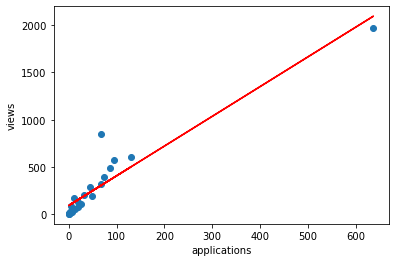

In [58]:
#df.plot(y=['applications', 'views'], style ='o')
#df.plot(kind='scatter', x='applications', y='views')
x, y = df['applications'].values.reshape(-1, 1), df['views'].values.reshape(-1, 1)
linear_regression = LinearRegression()
linear_regression.fit(x,y)
y_pred = linear_regression.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('applications')
plt.ylabel('views')
plt.show()

In [59]:

correlation = df['applications'].corr(df['views'])
print(correlation)

0.9439245551128402


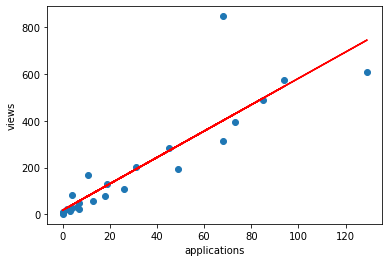

In [60]:
new_df = df[df.applications < 600]
x1, y1 = new_df['applications'].values.reshape(-1, 1), new_df['views'].values.reshape(-1, 1)
linear_regression = LinearRegression()
linear_regression.fit(x1,y1)
y_pred1 = linear_regression.predict(x1)
plt.scatter(x1, y1)
plt.plot(x1, y_pred1, color='red')
plt.xlabel('applications')
plt.ylabel('views')
plt.show()

There is a strong correlation between the number of views for a job  and the number of application for that job as expected

In [74]:
# Group by by state
#state_df = df.groupby("state")

In [61]:
df['skills']=df['skills'].apply(str)
df['Description'] = df['Description'].apply(str)

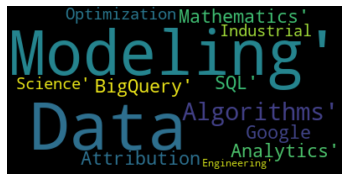

In [62]:
#let's start with the skills for the first job
words_skills_0 = df.skills[0]
wordcloud_s = WordCloud().generate(words_skills_0)
plt.imshow(wordcloud_s, interpolation='bilinear')
plt.axis("off")
plt.show()

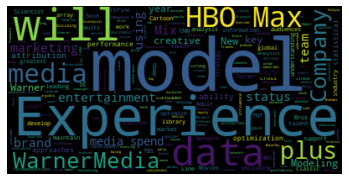

In [63]:
words_description_0 = df.Description[0]
wordcloud_d = WordCloud().generate(words_description_0)
plt.imshow(wordcloud_d, interpolation='bilinear')
plt.axis("off")
plt.show()

They are looking for somebody with experience, who knows how to make predictive models and deal with data. Let's filter some stopwords:

In [66]:
def extract_words(description):
    stops = set(stopwords.words('english'))
    #extract words that are not stopwords
    meaningful_words = [item for item in description if not item in stops]
    return meaningful_words

In [ ]:
description = 'this is a string'

In [ ]:
class Person:
    def __init__(self, name):
    self.name = name
    
    def say_hello(self):
        print(f'Hi, my name is {self.name}')
    
    def change_name(self, new_name):
        self.name = new_name

In [ ]:
ryan = Person('Ryan')

In [ ]:
ryan.change_name('something else')
ryan.say_hello()

In [ ]:
description = 'this is a string'

In [ ]:
description.capitalize()

In [ ]:
description.split(",")

My function is not working!!!

In [32]:
list(df.Description.fillna(" "))

['Company Overview \n\nWarnerMedia is a leading media and entertainment company that creates and distributes premium and popular content from a diverse array of talented storytellers and journalists to global audiences through its consumer brands including: HBO, HBO Max, Warner Bros., TNT, TBS, truTV, CNN, DC Entertainment, New Line, Cartoon Network, Adult Swim, Turner Classic Movies and others.\n\n HBO Max is the future of entertainment and storytelling.  \u202f WarnerMedia’s streaming entertainment offering, HBO Max launched in May 2020 and is the culmination of some of the most innovative new technology and greatest creative talent in the industry. Anchored by the entire HBO service, arguably the greatest brand in television, HBO Max also features\u202ffan favorites from the WarnerMedia library including\u202fWarner Bros., New Line, DC, CNN, TNT, TBS, truTV, Turner Classic Movies, Cartoon Network, Adult Swim, Crunchyroll, Rooster Teeth, Looney Tunes, and more.\u202fHBO Max is home t

In [38]:
text = df.Description

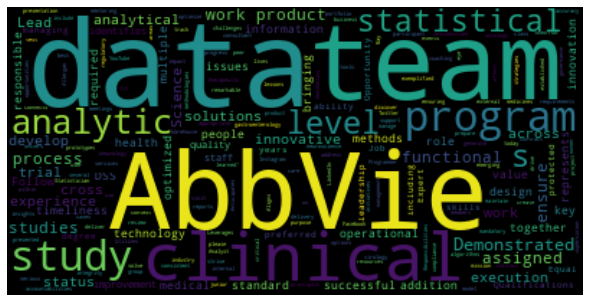

In [69]:
cloud = WordCloud().generate(text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [74]:
# Removing stopwords from the cloud
stopwords = set(STOPWORDS)
stopwords.update(["stopword1", "stopword2"])
cloud_update = WordCloud(stopwords=stopwords).generate(text)

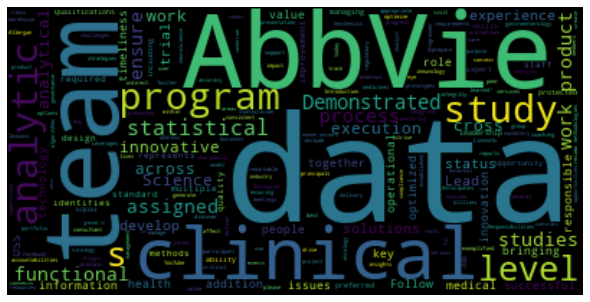

In [75]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud_update, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

After filtering stopwords, we still have some meaningless words, even though we can tell that most jobs are 
looking for people with skills in data, we can work in team, etc

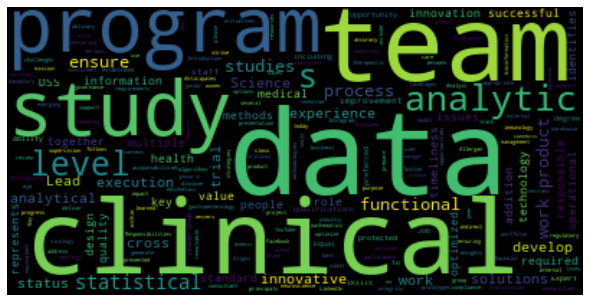

In [78]:
new_stopwords = set(STOPWORDS)
new_stopwords.update(['AbbVie', 'assigned', 'across', 'Demonstrated', 'follow', 'bringing'])
cloud_new_update = WordCloud(stopwords=new_stopwords).generate(text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud_new_update, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Much better